<a href="https://colab.research.google.com/github/TabithaKO/CS132-Geometric-Algorithms/blob/master/realtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Begin by clicking on Edit => Notebook Settings => GPU => save
This allows you to run this model on a GPU (it's a whole lot faster)

Run the cells by clicking shift followed by enter or press the play button on the side

Read the comments before running the cell, some of these are optional

In [0]:
# Mount your google drive if that's where your data is stored
#if not just proceed without this cell
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


All of these instructions are [here](https://pjreddie.com/darknet/yolo/)

In [32]:
# clone the darknet repository
!git clone https://github.com/AlexeyAB/darknet/

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13567 (delta 1), reused 1 (delta 0), pack-reused 13559
Receiving objects: 100% (13567/13567), 12.21 MiB | 22.95 MiB/s, done.
Resolving deltas: 100% (9256/9256), done.


I got the next cell from [this](https://medium.com/@artinte7/real-time-object-detection-using-yolo-upon-google-colab-in-5-minutes-fd65a4903df5) medium article

In [33]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-Wunused-variable]
     int 

In [34]:
# get yolov3 weights
# this line downloads the weights from the YOLO website
!wget https://pjreddie.com/media/files/yolov3.weights
!chmod a+x ./darknet

--2020-05-27 23:50:10--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   553KB/s    in 7m 1s   

2020-05-27 23:57:12 (575 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [37]:
# Use this cell to upload the files of your choice
# I will upload janet.jpg (a picture with a lot of items)
# Feel free to upload pictures if you want
from google.colab import files
uploaded = files.upload()

Saving janet.jpg to janet.jpg


In [38]:
# run this to check if your files were successfully uploaded
# I renamed it after uploading
!ls

3rdparty	darknet			janet.jpg	       scripts
backup		DarknetConfig.cmake.in	json_mjpeg_streams.sh  src
build		darknet.py		LICENSE		       video_v2.sh
build.ps1	darknet_video.py	Makefile	       video_yolov3.sh
build.sh	data			net_cam_v3.sh	       yolov3.weights
cfg		image_yolov2.sh		obj
cmake		image_yolov3.sh		README.md
CMakeLists.txt	include			results


Replace janet.jpg with <the_name_of_your_image.jpg>


In [0]:
# copy the file into your data folder
!cp janet.jpg data/

In [40]:
#run the model on your image
# your results will be saved as predictions.jpg
# if you double click on it in the files tab you get to view it

!./darknet detect cfg/yolov3.cfg yolov3.weights data/janet.jpg 

 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF


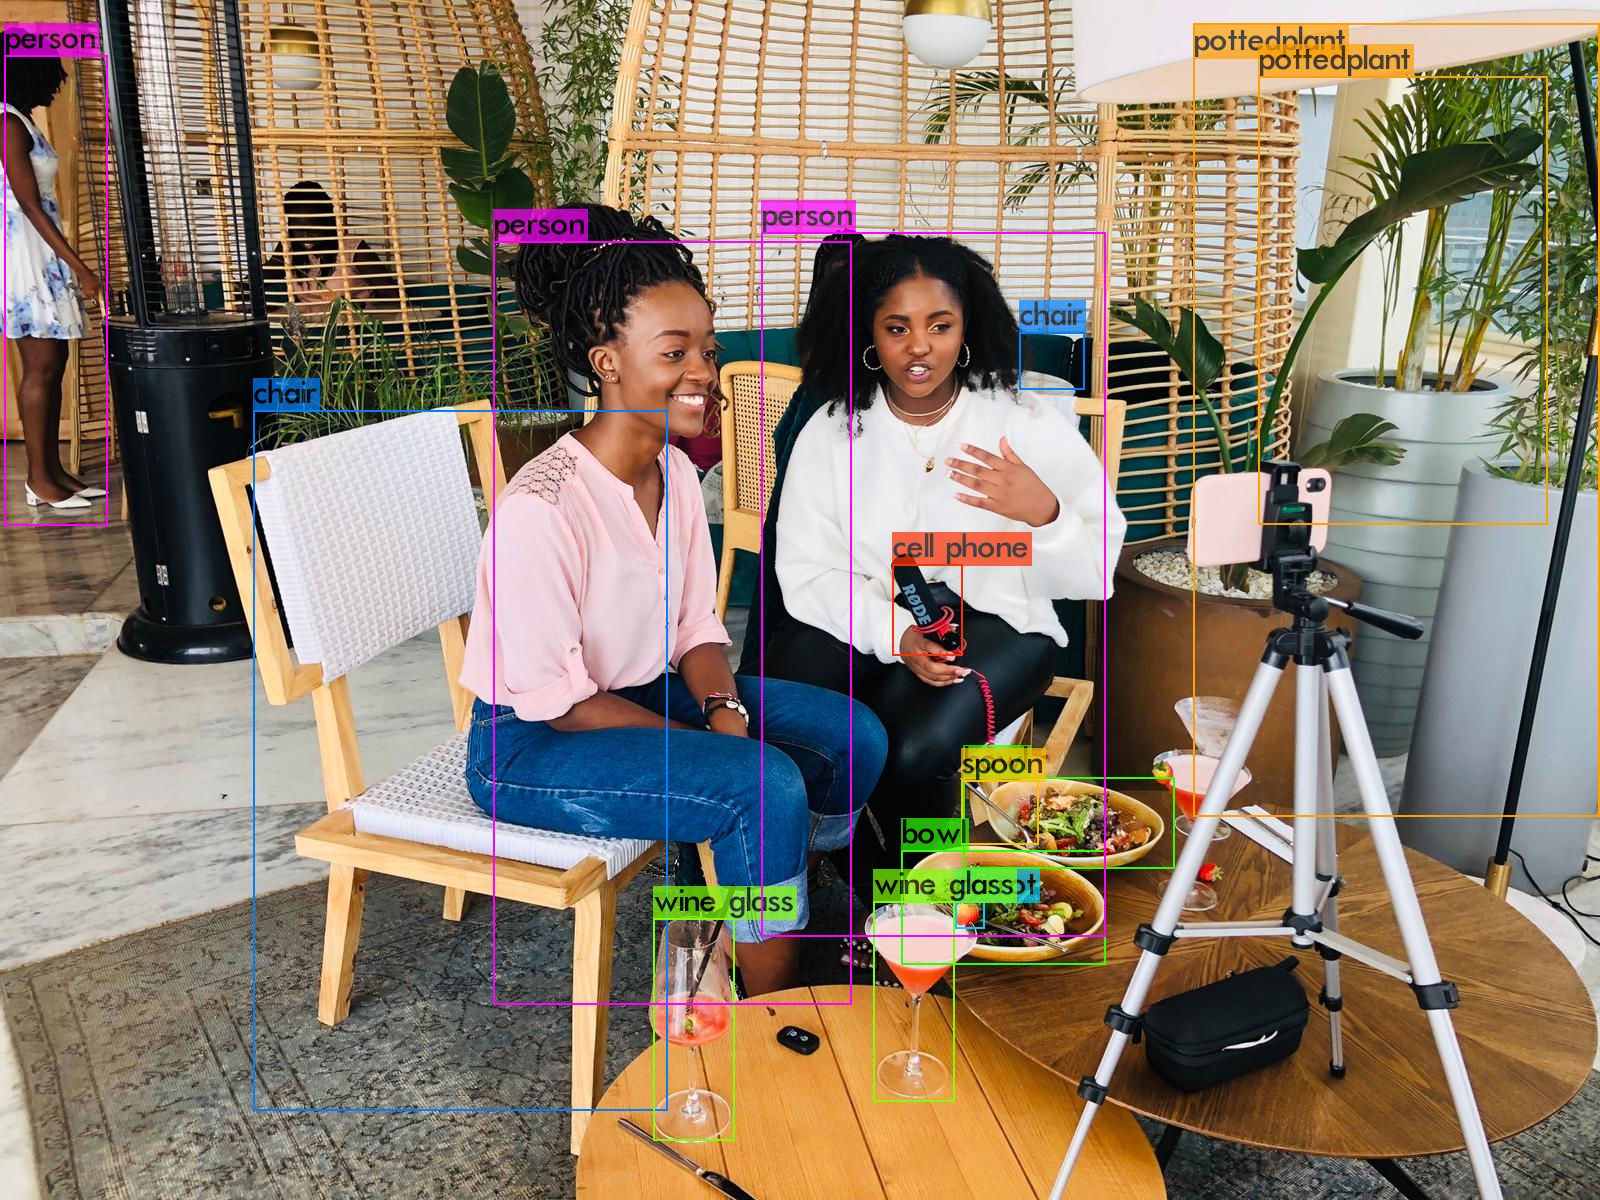

In [41]:
# helper function to help us view our image
import cv2
from google.colab.patches import cv2_imshow

def display():
  img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
  cv2_imshow(img)

display()

In [42]:
# Use this cell to upload the files of your choice
# I will upload a .mp4 video
# Feel free to upload pictures if you want
from google.colab import files
uploaded = files.upload()

Saving movie.mp4 to movie.mp4


In [47]:
# run the model on your video
# the output is an .mp4 file yolo_output.mp4 that you can download
# having thresh as 0.7 allows us to only detect objects that have an accuracy of 70%
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show movie.mp4 i 0 -out_filename out.mp4


 CUDA-version: 10010 (10010), GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.00

Wanna learn more about YOLO:
https://pjreddie.com/darknet/yolo/